# CodSoft

# Data Science


## TASK 2- Movie Rating Prediction with Python


### Name: Melissa Dsouza

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the data

In [143]:
movie_data=pd.read_csv("C:/Users/dsouz/OneDrive/Desktop/Internship/IMDb-Movies-India.csv", encoding='latin1')

In [144]:
movie_data.shape

(15509, 10)

In [145]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [146]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [147]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


#### Data Cleaning and Preprocessing

In [148]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [149]:
movie_data.duplicated().sum()

6

In [150]:
movie_data.drop_duplicates(inplace=True)

In [151]:
movie_data.duplicated().sum()

0

In [152]:
movie_data["Rating"].fillna(movie_data["Rating"].mean(),inplace=True)

In [153]:
movie_data = movie_data.replace('NaN', np.nan)

In [154]:
movie_data.dropna(subset=["Year","Genre","Votes","Director","Actor 1","Actor 2","Actor 3",'Rating'],inplace=True)

In [155]:
movie_data.isnull().sum()

Name           0
Year           0
Duration    1900
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [156]:
movie_data["Genre"]=movie_data["Genre"].str.split(",").explode("Genre").reset_index(drop=True)

In [157]:
movie_data['Genre'].unique()

array(['Comedy', ' Musical', 'Drama', ' War', 'Horror', ' Mystery',
       ' Thriller', 'Action', ' Crime', ' Romance', ' Drama', 'Crime',
       ' Horror', ' History', 'Thriller', 'Adventure', ' Sci-Fi', 'Sport',
       'Biography', ' Sport', ' Adventure', ' Fantasy', ' Comedy',
       'Mystery', 'Fantasy', 'Musical', 'Romance', ' Family', ' Music',
       'Sci-Fi', 'Music', 'Family', 'Documentary', 'Animation',
       ' Biography', ' Action', 'War', ' Western', 'History', nan],
      dtype=object)

In [158]:
movie_data["Genre"]=movie_data["Genre"].str.replace(" ","")

In [160]:
value= 'nan'
movie_data=movie_data[movie_data['Genre'] != value]

In [161]:
movie_data.sort_values(by="Rating",ascending=False,inplace=True)

In [ ]:
movie_data["Genre"]=movie_data.groupby("Genre")["Rating"].transform("mean")
movie_data["Director"]=movie_data.groupby("Director")["Rating"].transform("mean")
movie_data["Actor 1"]=movie_data.groupby("Actor 1")["Rating"].transform("mean")
movie_data["Actor 2"]=movie_data.groupby("Actor 2")["Rating"].transform("mean")
movie_data["Actor 3"]=movie_data.groupby("Actor 3")["Rating"].transform("mean")
movie_data["Name"]=movie_data.groupby("Name")["Rating"].transform("mean")

#### Visualization

Text(0.5, 1.0, 'Top 10 Movies')

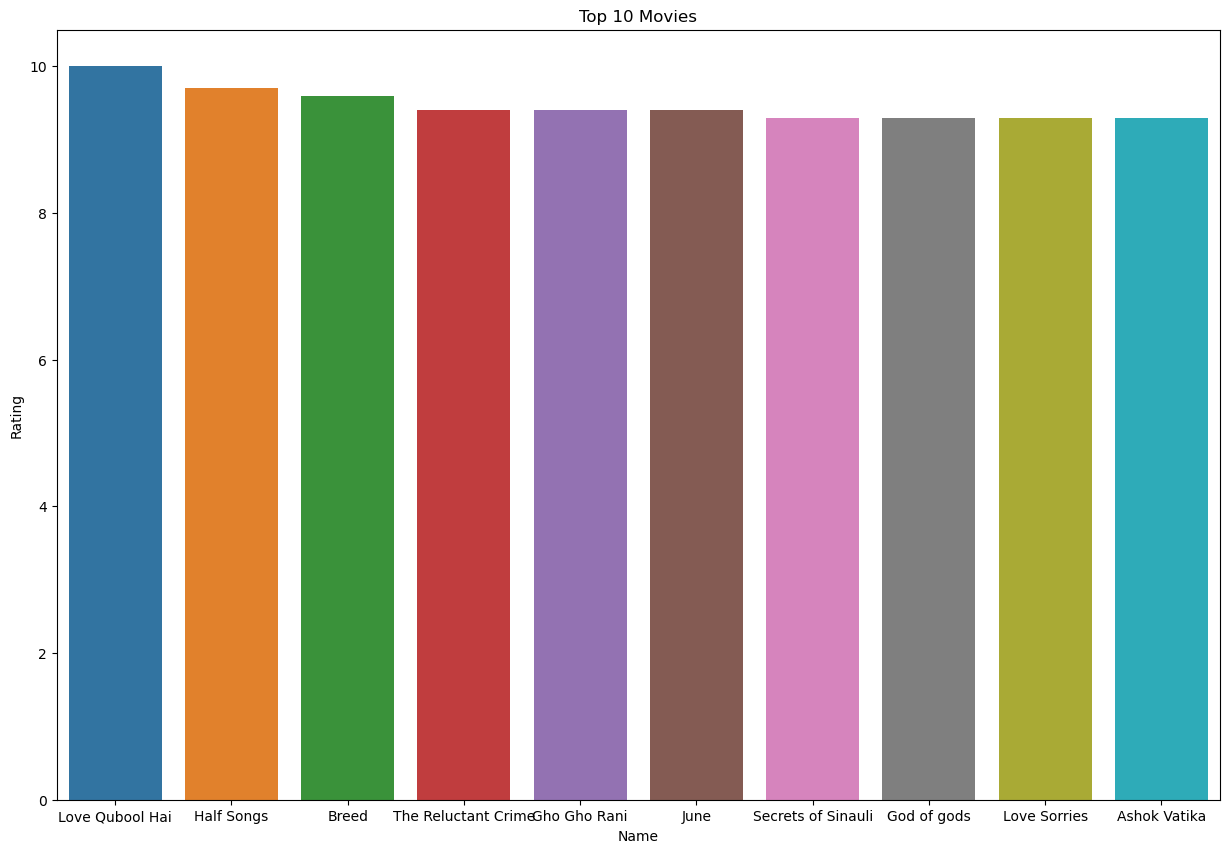

In [162]:
plt.figure(figsize=(15,10))
sns.barplot(x=movie_data["Name"].head(10),y=movie_data["Rating"])
plt.title("Top 10 Movies")

Text(0.5, 1.0, 'Top 10 directors')

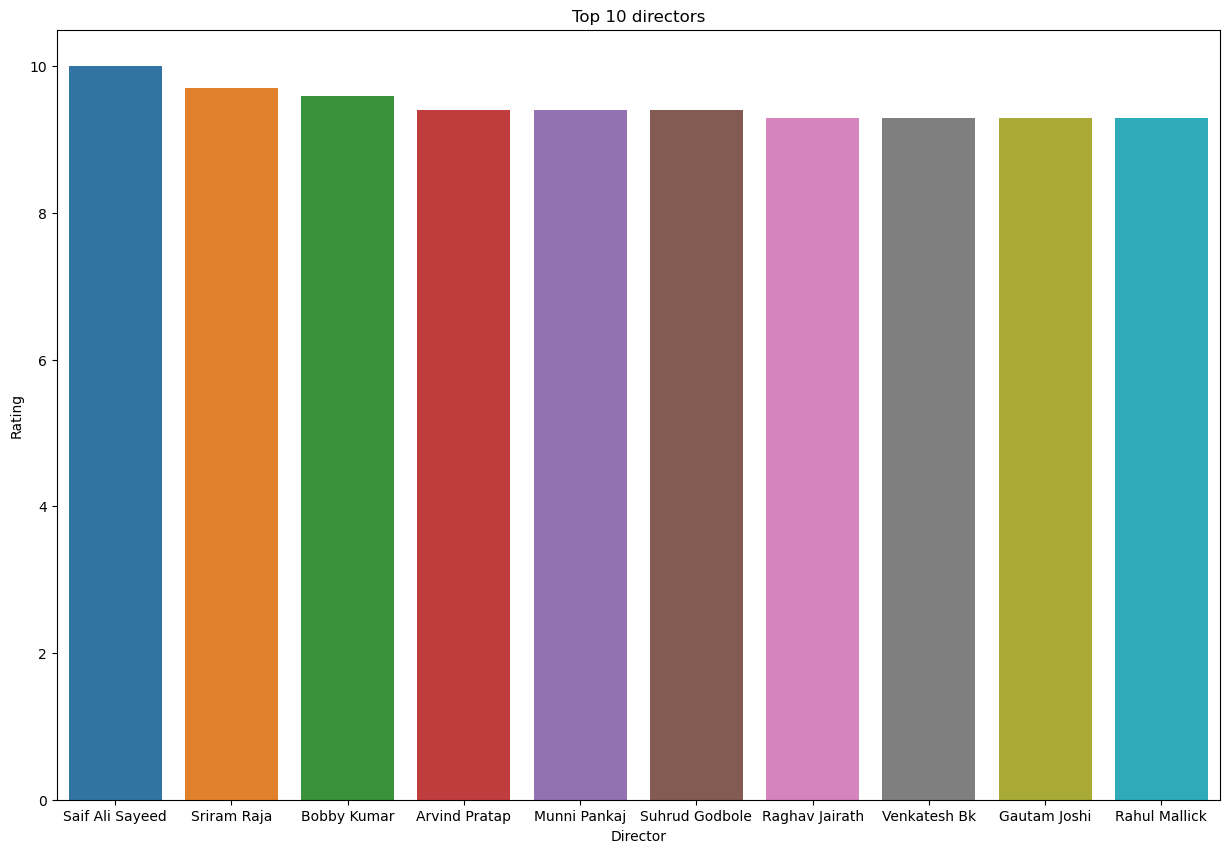

In [163]:
plt.figure(figsize=(15,10))
sns.barplot(x=movie_data["Director"].head(10),y=movie_data["Rating"])
plt.title("Top 10 directors")

#### Data Modelling

In [165]:
X= movie_data[['Genre','Director','Actor 1','Actor 2','Actor 3']]
Y=movie_data['Rating']

In [166]:
X = X.dropna()
#Y = Y[X.index]

In [170]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Check and align indices
common_indices = X.index.intersection(Y.index)
X = X.loc[common_indices]
Y = Y.loc[common_indices]

# Ensure the lengths are consistent
print("Length of X after alignment:", len(X))
print("Length of Y after alignment:", len(Y))


Length of X after alignment: 3749
Length of Y after alignment: 3749


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [174]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [175]:
prediction= model.predict(X_test)
prediction

array([5.73996031, 5.77991756, 5.79427725, 5.77437892, 5.81180694,
       5.78590816, 5.77689358, 5.87654671, 5.81698516, 5.76732178,
       5.79376862, 5.77974567, 5.79586871, 5.82447115, 5.82537304,
       5.76970438, 5.80212135, 5.81710704, 5.82943364, 5.72676125,
       5.70908415, 5.78863939, 5.83564612, 5.78922395, 5.82025462,
       5.84564169, 5.82951518, 5.81894724, 5.76983892, 5.82039474,
       5.78556442, 5.77344793, 5.78735119, 5.77387232, 5.78091282,
       5.76505892, 5.76766377, 5.81329286, 5.81852942, 5.78725217,
       5.7417883 , 5.7494098 , 5.76482472, 5.81438952, 5.76952921,
       5.70892874, 5.6886459 , 5.77620645, 5.83447431, 5.69598947,
       5.81553181, 5.85749621, 5.79174453, 5.80572632, 5.77245044,
       5.78041048, 5.77392299, 5.80071097, 5.77399889, 5.83987223,
       5.86369277, 5.77111458, 5.84464765, 5.85167482, 5.7230958 ,
       5.76137479, 5.75193774, 5.81483885, 5.76236537, 5.73622446,
       5.80407615, 5.76023578, 5.87515574, 5.76823675, 5.78489